# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [46]:
import pandas as pd
import numpy as np                                 

import pylab as plt                                
import seaborn as sns                              
sns.set(style='white')   
from sklearn.linear_model import LinearRegression as LinReg  
from sklearn.model_selection import train_test_split as tts
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [47]:
X= {
    'StudentID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
}

y = { 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]

}


df = pd.DataFrame({**X, **y})


In [48]:
df.head()

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4


In [49]:
X = df.drop('Tardies', axis=1)

y = df.Tardies

Draw a dispersion diagram (scatter plot) for the data.

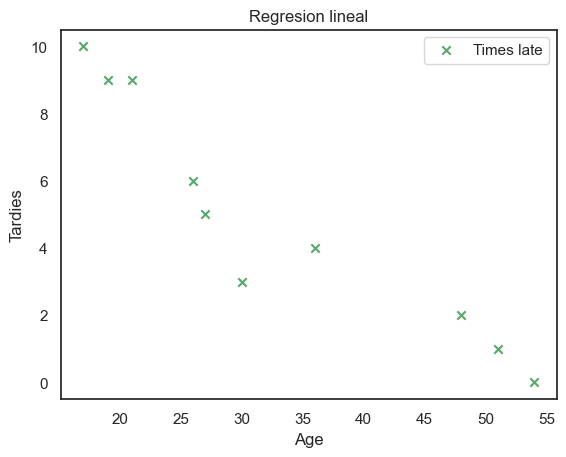

In [50]:
plt.scatter(df.Age, df.Tardies, marker='x', c='g', label='Times late')


plt.title('Regresion lineal')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.legend()
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [51]:
# Pues parece que hay algo de relación lineal negativa entre ellas, pero we will confirm

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [52]:
covariance = df['Age'].cov(df['Tardies'])
correlation = df['Age'].corr(df['Tardies'])
print('Covarianza:', covariance)
print('Correlación:', correlation)

Covarianza: -45.56666666666666
Correlación: -0.9391626886887122


In [53]:
df.cov()


,StudentID,Age,Tardies
StudentID,9.166667,7.722222,-3.722222
Age,7.722222,187.655556,-45.566667
Tardies,-3.722222,-45.566667,12.544444


In [54]:
df.corr()

,StudentID,Age,Tardies
StudentID,1.000000,0.186190,-0.347113
Age,0.186190,1.000000,-0.939163
Tardies,-0.347113,-0.939163,1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [55]:
x = sm.add_constant(df.Age)

y = df.Tardies

modelo = sm.OLS(y, x).fit()

y_pred = modelo.predict(x)

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Wed, 24 May 2023   Prob (F-statistic):           5.57e-05
Time:                        16:51:13   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot your regression model on your scatter plot.

In [56]:
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R2 Score: 0.9127622889980797
Mean Squared Error: 0.9849137572116813
Mean Absolute Error: 0.8226027478736693


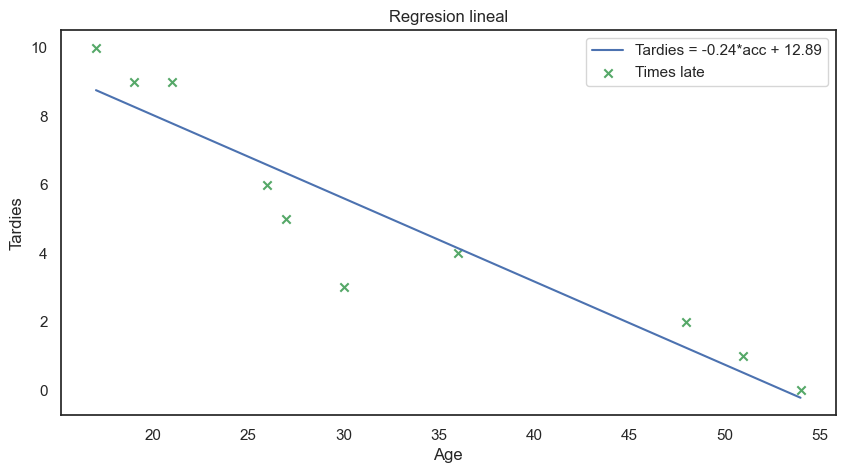

In [57]:
x=np.linspace(df.Age.min(), df.Age.max(), 10)
y=-0.2428*x + 12.8888

plt.figure(figsize=(10, 5))
           
plt.plot(x, y, label=f'Tardies = {-0.24}*acc + {12.89}')

plt.scatter(df.Age, df.Tardies, marker='x', c='g', label='Times late')


plt.title('Regresion lineal')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.legend()
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

## Conclusiones

Para saber si hay regreseión lineal se puede mirar de tres formas:

- Crear un diagrama de dispersión y ver como se ajustan a la recta. En este caso se ajustaban bastante y lo podíamos ir viendo.

- Calcular el coeficiente de correlacion y covarianza. Con la correlación a -0.93 vemos que es una fuerte correlación lineal negativa (o sea, con pdte pabajo). La covarianza a -45.5 

- Linealidad. Con el OLC hemos calculado la linealidad y plasmado en el diagrama para comprobarlo. Se ve claramente que los puntos están cerquita de la linea.

Así que sí, tienen una buena regresión lineal.

In [58]:
model = LinReg()

model.fit(X, y)

y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R2 Score: 1.0
Mean Squared Error: 2.9187853493177438e-30
Mean Absolute Error: 1.3322676295501878e-15


In [59]:
# creo que esto se podría entrenar con el modelo linearregression y sería bastante accurate para las predicciones pero no lo hace porque los MSE y MAE son pila altos o sea que hay bastantes que no pilla.
# we will continue

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [60]:
ve = pd.read_csv('vehicles.csv')
ve.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [75]:
X = ve.drop(['Make', 'Model', 'Engine Displacement', 'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type', 'City MPG', 'Highway MPG', 'CO2 Emission Grams/Mile'], axis=1)

y = ve['CO2 Emission Grams/Mile']

ve2 = ve.drop(['Make', 'Model', 'Engine Displacement', 'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type', 'City MPG', 'Highway MPG'], axis=1)

In [81]:
ven = ve._get_numeric_data()
ven.corr()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


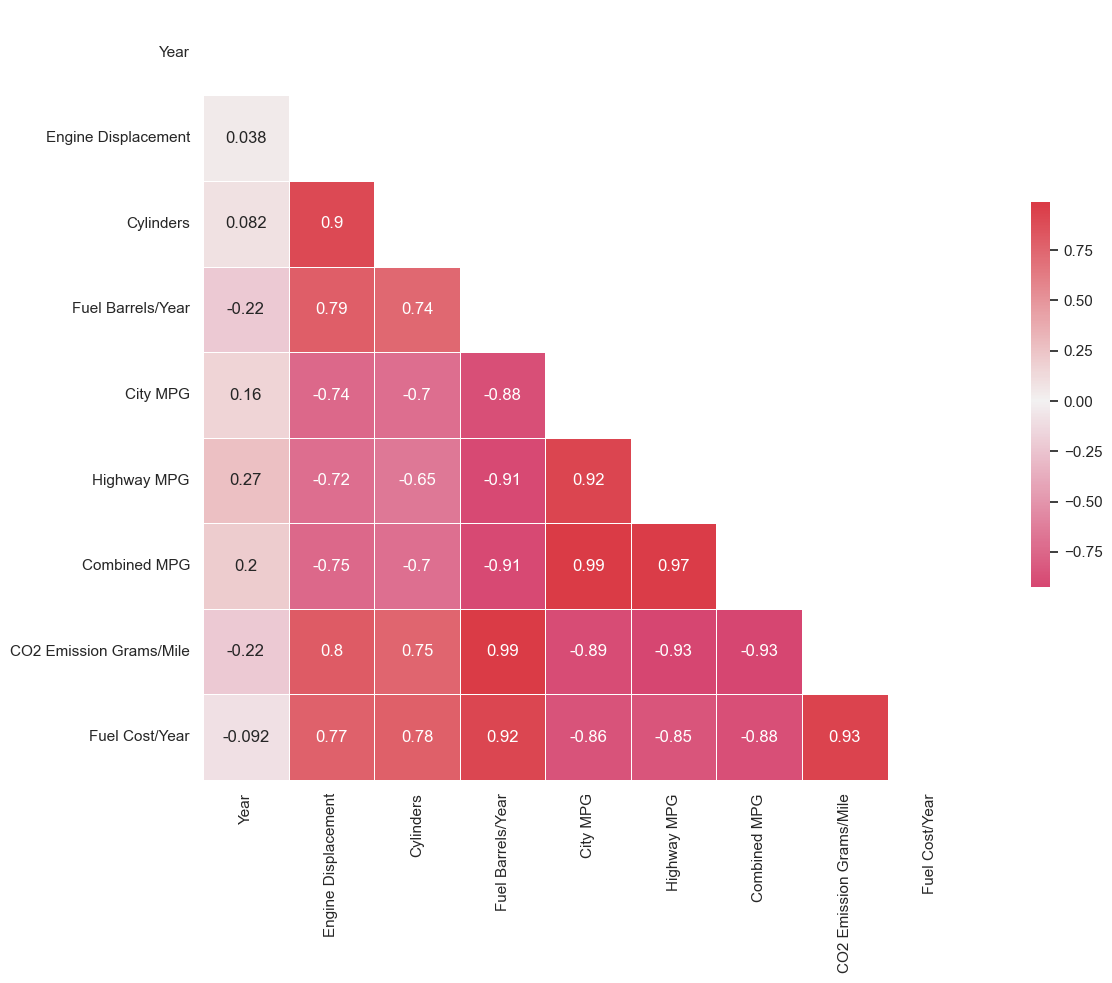

In [69]:
def plot_correlation_heatmap(df):
    numeric_columns = df.select_dtypes(include=np.number)

    plt.figure(figsize=(15, 10))
    sns.set(style='white')

    mask = np.triu(np.ones_like(numeric_columns.corr(), dtype=bool))
    cmap = sns.diverging_palette(0, 10, as_cmap=True)

    sns.heatmap(numeric_columns.corr(),
                mask=mask,
                cmap=cmap,
                center=0,
                square=True,
                annot=True,
                linewidths=0.5,
                cbar_kws={'shrink': 0.5})

    plt.show()

plot_correlation_heatmap(ve)

In [82]:
ve2.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.082469,-0.221084,0.204751,-0.222300,-0.091913
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.986189,0.916208
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,0.930865,1.000000


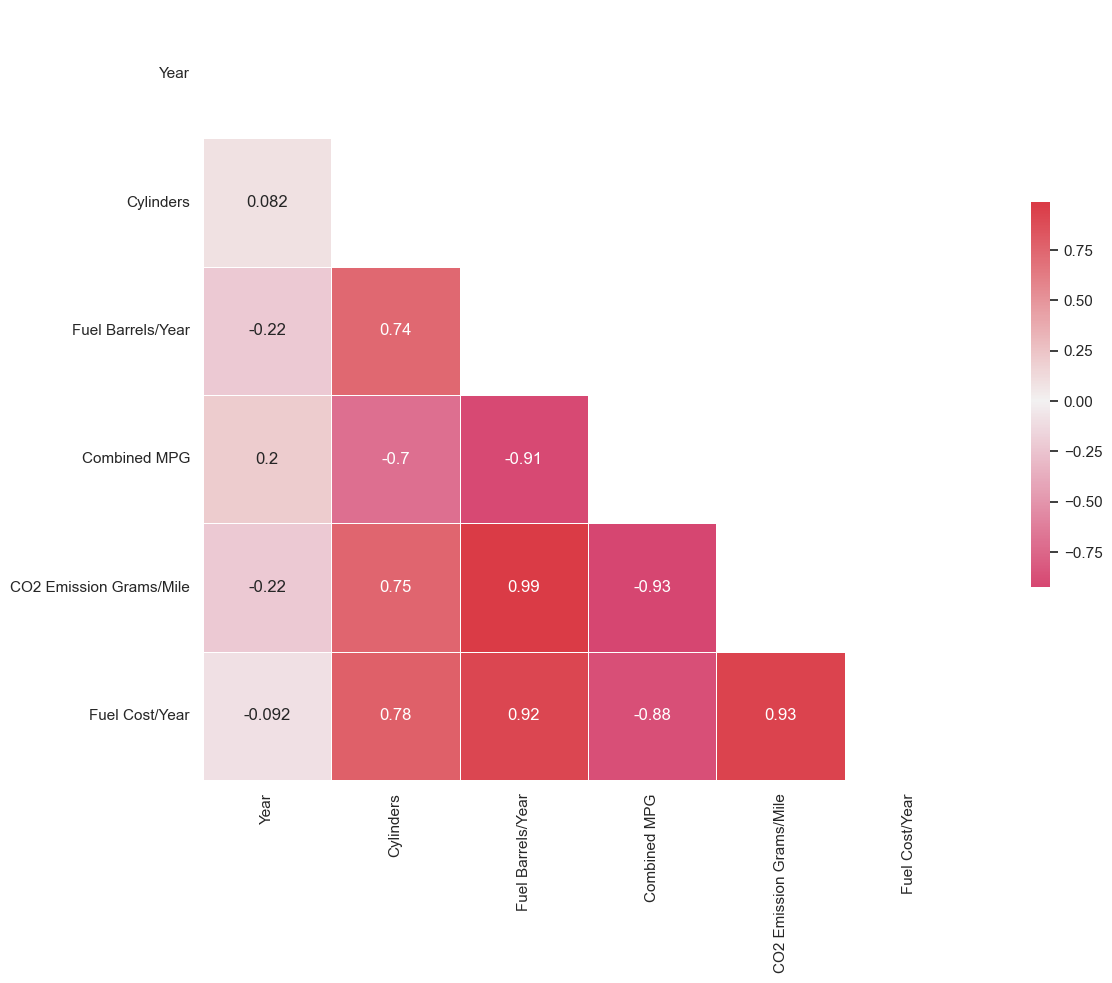

In [76]:
plot_correlation_heatmap(ve2)

In [72]:
X.isnull().any()

Year                       False
Cylinders                  False
Fuel Barrels/Year          False
Combined MPG               False
CO2 Emission Grams/Mile    False
Fuel Cost/Year             False
dtype: bool

In [73]:
y.isnull().any()

False

In [77]:
ve2.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,1984,4.0,19.388824,17,522.764706,1950
1,1984,6.0,25.354615,13,683.615385,2550
2,1985,4.0,20.600625,16,555.437500,2100
3,1985,6.0,25.354615,13,683.615385,2550
4,1987,6.0,20.600625,16,555.437500,2550


In [79]:
x=sm.add_constant(ve2[[
    
    'Year',
    'Cylinders',
    'Fuel Barrels/Year',
    'Combined MPG',
    'CO2 Emission Grams/Mile',
    'Fuel Cost/Year'
    
]].apply(lambda x: x.fillna(x.mean()))

)


modelo=sm.OLS(y, x).fit()

pred=modelo.predict(x)

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       1.000
Model:                                 OLS   Adj. R-squared:                  1.000
Method:                      Least Squares   F-statistic:                 6.196e+30
Date:                     Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                             17:47:58   Log-Likelihood:             8.9532e+05
No. Observations:                    35952   AIC:                        -1.791e+06
Df Residuals:                        35945   BIC:                        -1.791e+06
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1.036e-11   4.45e-12     -2.326      0.020   -1.91e-11   -1.63e-12
Year                     3.698e-15   2.21e-15      1.671      0.095    -6.4e-16    8.04e-15
Cylinders                1.865e-14   1.88e-14      0.991      0.322   -1.82e-14    5.56e-14
Fuel Barrels/Year        2.554e-14   2.64e-14      0.965      0.334   -2.63e-14    7.74e-14
Combined MPG            -3.997e-15   1.02e-14     -0.392      0.695    -2.4e-14     1.6e-14
CO2 Emission Grams/Mile     1.0000   1.19e-15   8.43e+14      0.000       1.000       1.000
Fuel Cost/Year          -3.608e-16   1.15e-16     -3.139      0.002   -5.86e-16   -1.36e-16
==============================================================================
Omnibus:                     5549.571   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12626.478
Skew:                           0.902   Prob(JB):                         0.00
Kurtosis:                       5.275   Cond. No.                     6.43e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Podemos sacar las siguientes conclusiones:
# El coeficiente de determinación (R-cuadrado) es de 0.981, por lo tanto,
# el modelo es capaz de capturar y predecir la mayoría de la variabilidad en las emisiones de CO2.
# Las variables Year, Cylinders, Fuel Barrels/Year, Combined MPG y Fuel Cost/Year están incluidas en el modelo y todas tienen coeficientes significativos (p < 0.05).
# Esto sugiere que todas estas variables tienen un impacto estadísticamente significativo en la predicción de las emisiones de CO2.
# El coeficiente para la variable Year es -0.3206. A medida que el año del vehículo aumenta, se espera que las emisiones de CO2 disminuyan.
# El coeficiente para la variable Cylinders es 1.8788. A medida que aumenta el número de cilindros, se espera un aumento en las emisiones de CO2.
# El coeficiente para la variable Fuel Barrels/Year es 19.0529. A medida que aumenta la cantidad de barriles de combustible consumidos, también aumentan las emisiones de CO2.
# El coeficiente para la variable Combined MPG es -3.0404. A medida que aumenta el consumo de combustible, se espera que las emisiones de CO2 disminuyan.
# El coeficiente para la variable Fuel Cost/Year es 0.0323. A medida que aumentan los costos de combustible, también aumentan las emisiones de CO2.
# En general, podemos concluir que las variables incluidas en el modelo tienen una influencia significativa en la predicción de las emisiones de CO2.
# Sin embargo, es importante tener en cuenta que el modelo asume ciertos supuestos y limitaciones,
# y las conclusiones se basan en los datos y el contexto específicos utilizados en el análisis.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [64]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [65]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [66]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [67]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [68]:
# Your response here. 